In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.utils import resample
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
from sklearn.preprocessing import LabelEncoder
lBL = LabelEncoder()

### Read the input file and check the data dimension

In [2]:
cred_data = pd.read_csv('german_credit.csv')

In [3]:
cred_data.shape

(1000, 21)

In [4]:
cred_data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [5]:
data_copy=cred_data.copy()
y= cred_data['default']
X= cred_data.drop('default', axis= 1)

In [6]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.5,random_state=1)

In [7]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [8]:
X1_train.shape

(500, 20)

In [9]:
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 789 to 37
Data columns (total 20 columns):
account_check_status          500 non-null object
duration_in_month             500 non-null int64
credit_history                500 non-null object
purpose                       500 non-null object
credit_amount                 500 non-null int64
savings                       500 non-null object
present_emp_since             500 non-null object
installment_as_income_perc    500 non-null int64
personal_status_sex           500 non-null object
other_debtors                 500 non-null object
present_res_since             500 non-null int64
property                      500 non-null object
age                           500 non-null int64
other_installment_plans       500 non-null object
housing                       500 non-null object
credits_this_bank             500 non-null int64
job                           500 non-null object
people_under_maintenance      500 non-null int64
t

In [10]:
X1_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_in_month,500.0,20.978,11.850671,4.0,12.00,18.0,24.00,60.0
credit_amount,500.0,3323.076,2875.025473,343.0,1369.25,2342.5,4070.25,18424.0
installment_as_income_perc,500.0,2.916,1.125824,1.0,2.00,3.0,4.00,4.0
present_res_since,500.0,2.860,1.076437,1.0,2.00,3.0,4.00,4.0
age,500.0,36.024,11.792266,19.0,27.00,33.0,43.00,75.0
credits_this_bank,500.0,1.400,0.576771,1.0,1.00,1.0,2.00,4.0
people_under_maintenance,500.0,1.138,0.345245,1.0,1.00,1.0,1.00,2.0


### Of the 20 attributes, 7 are numerical and the rest 13 are categorical. Of the 7, only 3 attributes are continous numeric in nature. They are ;

    1. age
    2. credit_amount
    3. duration_in_month
    
#### the other 4 attributes, 

    4. installment_as_income_perc
    5. present_res_since
    6. credits_this_bank
    7. people_under_maintenance
    
#### though numeric are ordinal in nature

### The below variables need dummy-encoding:

    1. credit_history
    2. purpose
    3. personal_status_sex
    4. other_installment_plans
    5. housing
    6. job
    7. telephone
    8. foreign_worker
    9. other_debtors
    
    
### The below variables, although categorical in nature, have ordered data hence label encoding will not work. We need to enforce Ordinal encoding where each level is given a numerical code based on the order of the level.

    10. account_check_status
    11. present_emp_since
    12. savings
    13. property    

In [11]:
X1_train.head()

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
789,< 0 DM,40,critical account/ other credits existing (not ...,(vacation - does not exist?),5998,... < 100 DM,1 <= ... < 4 years,4,male : single,none,3,unknown / no property,27,bank,own,1,skilled employee / official,1,"yes, registered under the customers name",yes
179,< 0 DM,21,critical account/ other credits existing (not ...,car (new),571,... < 100 DM,.. >= 7 years,4,male : single,none,4,real estate,65,none,own,2,skilled employee / official,1,none,yes
27,>= 200 DM / salary assignments for at least 1 ...,12,all credits at this bank paid back duly,domestic appliances,409,.. >= 1000 DM,1 <= ... < 4 years,3,female : divorced/separated/married,none,3,real estate,42,none,rent,2,skilled employee / official,1,none,yes
33,no checking account,12,critical account/ other credits existing (not ...,business,1264,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,unknown / no property,57,none,rent,1,unskilled - resident,1,none,yes
334,< 0 DM,24,no credits taken/ all credits paid back duly,radio/television,4110,... < 100 DM,.. >= 7 years,3,male : single,none,4,unknown / no property,23,bank,rent,2,skilled employee / official,2,none,yes


In [12]:
X1_train= pd.get_dummies(data=X1_train, columns=['credit_history', 'purpose','personal_status_sex','other_installment_plans','housing','job','telephone','foreign_worker','other_debtors'])

In [13]:
X1_train.shape

(500, 47)

In [14]:
account_check_status_dict ={'no checking account': 1,'< 0 DM': 2,'0 <= ... < 200 DM': 3,'>= 200 DM / salary assignments for at least 1 year': 4}
X1_train['account_check_status_ordinal']=X1_train.account_check_status.map(account_check_status_dict)

In [15]:
present_emp_since_dict ={'unemployed': 1,'... < 1 year ': 2,'1 <= ... < 4 years': 3,'4 <= ... < 7 years': 4,'.. >= 7 years':5}
X1_train['present_emp_since_ordinal']=X1_train.present_emp_since.map(present_emp_since_dict)

In [16]:
savings_dict = {'unknown/ no savings account': 1,'... < 100 DM': 2,'100 <= ... < 500 DM': 3,'500 <= ... < 1000 DM ': 4,'.. >= 1000 DM ':5}
X1_train['savings_ordinal']=X1_train.savings.map(savings_dict)

In [17]:
property_dict ={'unknown / no property': 1,'if not A121 : building society savings agreement/ life insurance': 2,'if not A121/A122 : car or other, not in attribute 6': 3,'real estate': 4}
X1_train['property_ordinal']=X1_train.property.map(property_dict)

In [18]:
X1_train.shape

(500, 51)

### Check for highly correlated variables but don't required any treatment for this use case

In [19]:
corr = X1_train.corr()

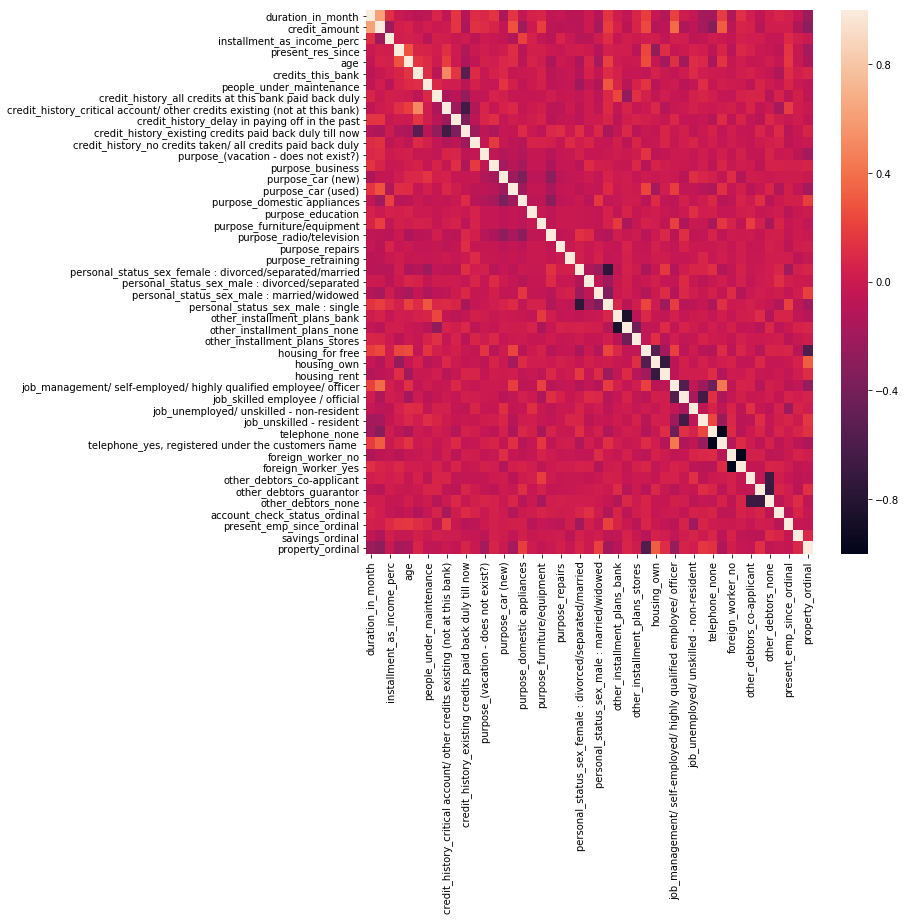

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [21]:
corr

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,...,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,account_check_status_ordinal,present_emp_since_ordinal,savings_ordinal,property_ordinal
duration_in_month,1.000000,0.621934,0.121678,-0.009039,-0.054504,-0.078458,-0.057544,0.070704,-0.061656,0.152454,...,0.185221,-0.127211,0.127211,2.290512e-02,-0.057392,0.025609,0.077320,0.044815,-0.041695,-0.223656
credit_amount,0.621934,1.000000,-0.215371,0.038010,0.058086,-0.021106,0.019018,-0.012746,0.003212,0.149106,...,0.318831,-0.062949,0.062949,4.761280e-02,-0.087920,0.030212,0.017634,0.023880,-0.132438,-0.285326
installment_as_income_perc,0.121678,-0.215371,1.000000,0.028310,0.042569,0.017900,-0.088701,0.033580,0.025395,-0.021834,...,-0.009868,-0.039202,0.039202,1.713432e-02,0.025501,-0.031047,-0.037176,0.098821,0.037433,-0.014496
present_res_since,-0.009039,0.038010,0.028310,1.000000,0.273547,0.064556,0.057483,0.022876,0.125258,0.007006,...,0.065494,-0.087317,0.087317,4.693446e-02,-0.011392,-0.025441,-0.066724,0.155751,-0.019989,-0.174833
age,-0.054504,0.058086,0.042569,0.273547,1.000000,0.142372,0.097632,0.001016,0.191111,-0.006296,...,0.144705,-0.027273,0.027273,-2.539442e-02,-0.016535,0.030417,-0.032648,0.166352,-0.016574,-0.128353
credits_this_bank,-0.078458,-0.021106,0.017900,0.064556,0.142372,1.000000,0.114729,-0.073716,0.500377,0.155977,...,-0.004274,-0.017713,0.017713,4.777882e-02,-0.006253,-0.029819,-0.127610,0.116272,0.037888,0.076246
people_under_maintenance,-0.057544,0.019018,-0.088701,0.057483,0.097632,0.114729,1.000000,0.083999,0.017894,0.018432,...,0.026513,0.007102,-0.007102,-6.518627e-02,0.062995,0.000728,-0.037380,0.073963,-0.009689,-0.049873
credit_history_all credits at this bank paid back duly,0.070704,-0.012746,0.033580,0.022876,0.001016,-0.073716,0.083999,1.000000,-0.145302,-0.080522,...,-0.026803,-0.048769,0.048769,6.699227e-02,0.063608,-0.094907,0.059526,-0.064224,0.032172,-0.056868
credit_history_critical account/ other credits existing (not at this bank),-0.061656,0.003212,0.025395,0.125258,0.191111,0.500377,0.017894,-0.145302,1.000000,-0.204966,...,0.014976,0.036782,-0.036782,6.717741e-02,-0.061276,-0.003424,-0.178785,0.180892,0.010969,-0.009430
credit_history_delay in paying off in the past,0.152454,0.149106,-0.021834,0.007006,-0.006296,0.155977,0.018432,-0.080522,-0.204966,1.000000,...,0.097804,-0.068795,0.068795,-4.699770e-02,-0.078933,0.091751,0.014208,-0.021853,0.009932,-0.040930


### Drop the original variables which are converted to dummy

In [22]:
# Removing the original varibales from the data frame which are replaced by ordinal coded variables
X1_train = X1_train.drop(['account_check_status','present_emp_since','savings','property'], axis =1)

In [23]:
X1_train.shape

(500, 47)

In [24]:
X1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 789 to 37
Data columns (total 47 columns):
duration_in_month                                                             500 non-null int64
credit_amount                                                                 500 non-null int64
installment_as_income_perc                                                    500 non-null int64
present_res_since                                                             500 non-null int64
age                                                                           500 non-null int64
credits_this_bank                                                             500 non-null int64
people_under_maintenance                                                      500 non-null int64
credit_history_all credits at this bank paid back duly                        500 non-null uint8
credit_history_critical account/ other credits existing (not at this bank)    500 non-null uint8
credit_history_delay 

#### get_dummies has already taken care of dropping the original variables from which the dummy variables were created

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X1_train,y1_train,test_size=0.3,random_state=1)

In [26]:
# Need to scale the dataset before running the model
X_train_scaled=X_train.apply(zscore)
X_test_scaled=X_test.apply(zscore)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [27]:
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train_scaled,y_train)

y_pred_test_rfcl = rfcl.predict(X_test_scaled)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [28]:
metrics.confusion_matrix(y_test,y_pred_test_rfcl)

array([[99,  5],
       [28, 18]], dtype=int64)

In [29]:
metrics.accuracy_score(y_test,y_pred_test_rfcl)

0.78

### Q6 Show the list of the features importance( 1 Marks)

In [30]:
important_features = pd.Series(data=rfcl.feature_importances_,index=X1_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print("The list of important features, ordered in a descending order of importance",end='\n\n')
print (important_features)

The list of important features, ordered in a descending order of importance

credit_amount                                                                 0.111239
age                                                                           0.093719
account_check_status_ordinal                                                  0.076901
duration_in_month                                                             0.068971
present_emp_since_ordinal                                                     0.050259
installment_as_income_perc                                                    0.047158
savings_ordinal                                                               0.039837
property_ordinal                                                              0.038469
present_res_since                                                             0.037812
purpose_car (new)                                                             0.026308
credit_history_critical account/ other credits existi

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [32]:
# Use below values
num_folds = 10
seed = 77

In [33]:
# Scaling the dataset
X1_train_scaled=X1_train.apply(zscore)

In [0]:
#Validate the Random Forest model build above using k fold

In [34]:
k_fold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
print ("Cross-Validation Score for each of the K folds: ",cross_val_score(rfcl, X1_train_scaled, y1_train, cv=k_fold, n_jobs=1))

Cross-Validation Score for each of the K folds:  [0.74 0.66 0.82 0.82 0.7  0.72 0.82 0.7  0.76 0.82]


In [35]:
kfold_cv_score = cross_val_score(rfcl, X1_train_scaled, y1_train, cv=k_fold, n_jobs=1)

In [36]:
#Calculate Mean score

In [37]:
kfold_cv_score.mean()

0.756

In [38]:
# Calculate score standard deviation using std()

In [39]:
kfold_cv_score.std()

0.05782732917920383

# Q8 Print the confusion matrix( 1 Marks)

In [40]:
y_pred_cv_rfcl = cross_val_predict(rfcl,X1_train_scaled,y1_train,cv=k_fold, n_jobs=1)
metrics.confusion_matrix(y1_train,y_pred_cv_rfcl)

array([[324,  20],
       [102,  54]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [41]:
#Accuracy Score
print ("Accuracy Score of 10 fold Cross-Validated RandomForestClassifier:",metrics.accuracy_score(y1_train,y_pred_cv_rfcl))

#Recall Score
print ("Recall Score of 10 fold Cross-Validated RandomForestClassifier:",metrics.recall_score(y1_train,y_pred_cv_rfcl))

#Precision Score
print ("Precision Score of 10 fold Cross-Validated RandomForestClassifier:",metrics.precision_score(y1_train,y_pred_cv_rfcl))

#F1 Score
print ("F1 Score of 10 fold Cross-Validated RandomForestClassifier:",metrics.f1_score(y1_train,y_pred_cv_rfcl))

Accuracy Score of 10 fold Cross-Validated RandomForestClassifier: 0.756
Recall Score of 10 fold Cross-Validated RandomForestClassifier: 0.34615384615384615
Precision Score of 10 fold Cross-Validated RandomForestClassifier: 0.7297297297297297
F1 Score of 10 fold Cross-Validated RandomForestClassifier: 0.46956521739130436


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

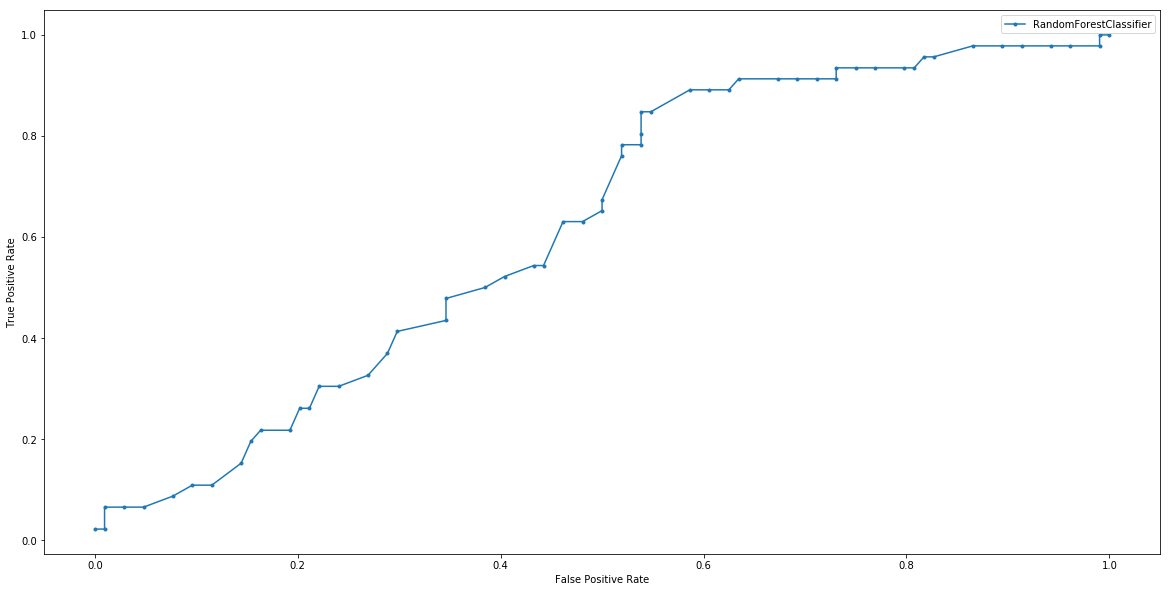

In [42]:
#Hint: Use roc_curve
# predict probabilities
lr_probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

plt.figure(figsize=(20,10))
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='RandomForestClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [43]:
lr_auc = metrics.roc_auc_score(y_test, lr_probs)

print('RandomForestClassifier: ROC AUC=%.3f' % (lr_auc))

RandomForestClassifier: ROC AUC=0.621


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [44]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [49]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())